##MODEL INTERPRETABILITY

##INTRODUCTION

Wine is an alcoholic beverage made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat. It is a pleasant tasting alcoholic beverage, loved cellebrated . It will definitely be interesting to analyze the physicochemical attributes of wine and understand their relationships and significance with wine quality and types classifications. To do this, We will proceed according to the standard Machine Learning and data mining workflow models mainly for:

Predict the quality of each wine sample, which can be low, high.

This dataset is public available for research purposes only, for more information, read Cortez et al., 2009. . Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

##ABSTRACT

Although we are attempting to predict wine quality as a target for a certain number of wines with a given set of predictor factors, wine quality is a subjective measurement. This is an EDA, or data-driven story, including a range of graphs and images as well as an attribute-based quality forecast.

##Model Interpretability

When individuals can understand the reasoning behind a model's predictions and conclusions, it can be said that the model is interpretable.


The easier it is to grasp and trust a model, the more interpretable it is.

For instance, black-box methods such as deep learning and gradient boosting are unintelligible due to their complexity and cannot be understood by humans. One cannot grasp the entire model at once and know the rationale for every choice.

In [1]:
#Install AutoML library - PyCaret
#!pip install pycaret

In [2]:
#Installing SHAP and other required libraries
#!pip install shap
#!pip install numpy==1.20

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
# import math 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Reading Data
Chateau_Montelena_AutoML = pd.read_csv('winequalityN.csv')

Chateau_Montelena_AutoMLB = Chateau_Montelena_AutoML.copy()


In [4]:
Chateau_Montelena_AutoML.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
def tableinfo(Chateau_Montelena_AutoML):
    print(f"Dataset Shape: {Chateau_Montelena_AutoML.shape}")
    summary = pd.DataFrame(Chateau_Montelena_AutoML.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = Chateau_Montelena_AutoML.isnull().sum().values    
    summary['Uniques'] = Chateau_Montelena_AutoML.nunique().values
    summary['Sample Value'] = Chateau_Montelena_AutoML.loc[0].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(Chateau_Montelena_AutoML[name].value_counts(normalize=True), base=10),2)
    return summary
tableinfo(Chateau_Montelena_AutoML)

Dataset Shape: (6497, 13)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,type,object,0,2,white,0.24
1,fixed acidity,float64,10,106,7.0,1.65
2,volatile acidity,float64,8,187,0.27,1.79
3,citric acid,float64,3,89,0.36,1.70
4,residual sugar,float64,2,316,20.7,2.08
5,chlorides,float64,2,214,0.045,1.90
6,free sulfur dioxide,float64,0,135,45.0,1.82
7,total sulfur dioxide,float64,0,276,170.0,2.32
8,density,float64,0,998,1.001,2.70
9,pH,float64,9,108,3.0,1.81


Entropy is defined as the randomness or measuring the disorder of the information being processed.

Actions required for data preparation:

Converting 'Type' to a integer data type.
Encoding categorical features.

In [6]:
print("Quality(%):")
print(round(Chateau_Montelena_AutoML['quality'].value_counts(normalize=True) * 100,2))

Quality(%):
6    43.65
5    32.91
7    16.61
4     3.32
8     2.97
3     0.46
9     0.08
Name: quality, dtype: float64


###Converting type values with Cat Codes

In [7]:
Chateau_Montelena_AutoML['type'] = Chateau_Montelena_AutoML['type'].astype("category").cat.codes
Chateau_Montelena_AutoML_copy = Chateau_Montelena_AutoML.copy()
Chateau_Montelena_AutoML.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int8   
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), int8(1)
memory usage: 615.6 KB


###Missing values - Knn Imputation

In [8]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
imputer = KNNImputer(n_neighbors=5)
Chateau_Montelena_AutoML = pd.DataFrame(imputer.fit_transform(Chateau_Montelena_AutoML), columns = Chateau_Montelena_AutoML.columns)

Chateau_Montelena_AutoML.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Analyzing the numeric features

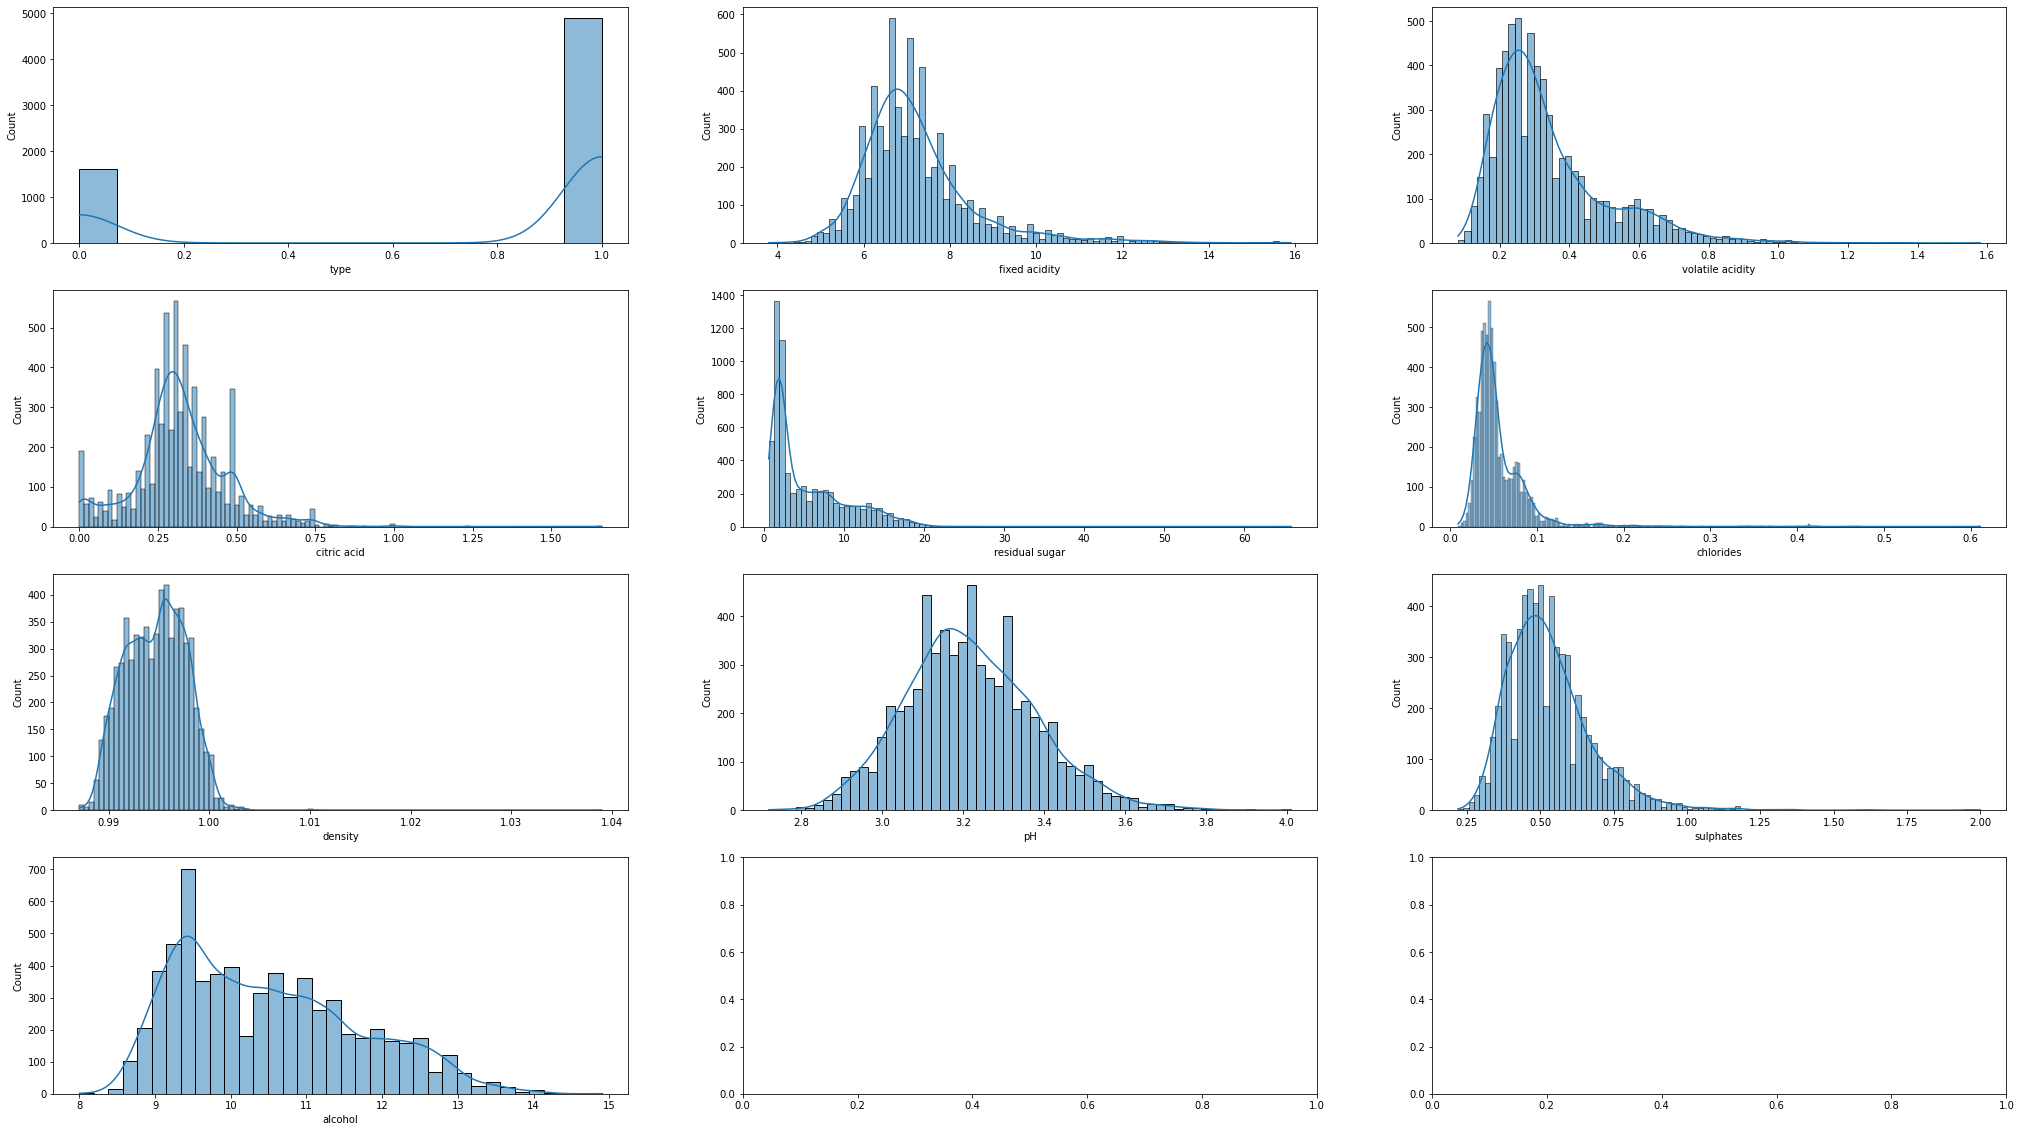

In [9]:
plot , ax = plt.subplots( 4,3 , figsize = (35 , 20))
g = sns.histplot(Chateau_Montelena_AutoML['type'] , kde = True , ax = ax[0][0])
g = sns.histplot(Chateau_Montelena_AutoML['fixed acidity'] , kde = True , ax = ax[0][1])
g = sns.histplot(Chateau_Montelena_AutoML['volatile acidity'] , kde = True , ax = ax[0][2])
g = sns.histplot(Chateau_Montelena_AutoML['citric acid'] , kde = True , ax = ax[1][0])
g = sns.histplot(Chateau_Montelena_AutoML['residual sugar'] , kde = True , ax = ax[1][1])
g = sns.histplot(Chateau_Montelena_AutoML['chlorides'] , kde = True , ax = ax[1][2])
g = sns.histplot(Chateau_Montelena_AutoML['density'] , kde = True , ax = ax[2][0])
g = sns.histplot(Chateau_Montelena_AutoML['pH'] , kde = True , ax = ax[2][1])
g = sns.histplot(Chateau_Montelena_AutoML['sulphates'] , kde = True , ax = ax[2][2])
g = sns.histplot(Chateau_Montelena_AutoML['alcohol'] , kde = True , ax = ax[3][0])

Observation :

These numerical variables are not following a normal distribution. These distributions indicate there are different data distributions present in population data with separate and independent peaks.

Action :

Data scaling, As most of the algorithms assume the data to be normally (Gaussian) distributed we Normalize these features.

In [10]:
Chateau_Montelena_AutoML.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
# cust_dummies=pd.get_dummies(cust)
Chateau_Montelena_AutoML_copy['type'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['type']])
Chateau_Montelena_AutoML_copy['fixed acidity'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['fixed acidity']])
Chateau_Montelena_AutoML_copy['volatile acidity'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['volatile acidity']])
Chateau_Montelena_AutoML_copy['citric acid']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['citric acid']])
Chateau_Montelena_AutoML_copy['residual sugar']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['residual sugar']])
Chateau_Montelena_AutoML_copy['chlorides']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['chlorides']])
# Chateau_Montelena_AutoML_copy['free sulphur dioxide']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['free sulphur dioxide']]) 
# Chateau_Montelena_AutoML_copy['total sulphur dioxide']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['total sulphur dioxide']])
Chateau_Montelena_AutoML_copy['density'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['density']])
Chateau_Montelena_AutoML_copy['pH'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['pH']])
Chateau_Montelena_AutoML_copy['sulphates'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['sulphates']])
Chateau_Montelena_AutoML_copy['alcohol'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['alcohol']])

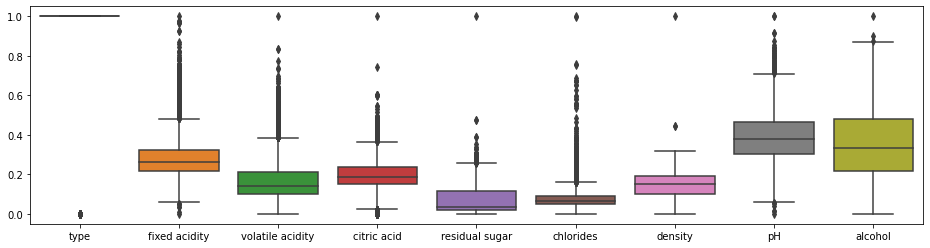

In [12]:
plt.figure(figsize=(16,4))
sns.boxplot(data=Chateau_Montelena_AutoML_copy[['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','density','pH','alcohol']])

##Multicolinearity

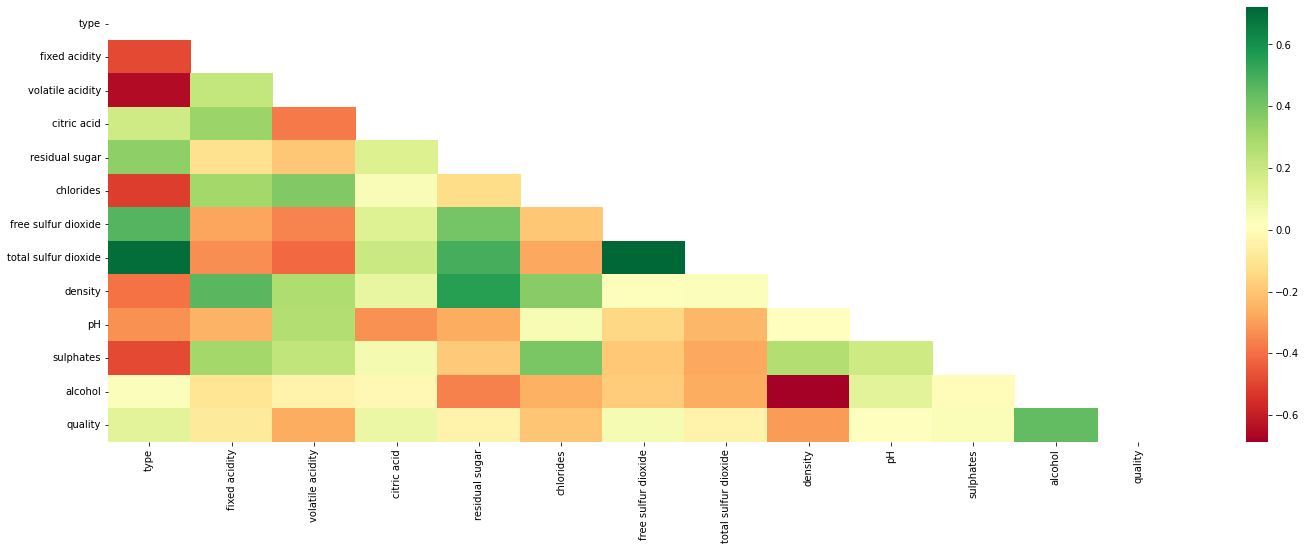

In [13]:
plt.figure(figsize=(24,8))
corr = Chateau_Montelena_AutoML_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, cmap='RdYlGn')

**Observation :**

By looking at the correlation mattrix above we can gain the following insights:

* volatile acidity and chlorides is highly (-ve) correlated with type.
* alcohol is highly (-ve) correlated with density.
* total sulpher dioxide is highly (+ve) correlated with type.

**Action :**

Dropping some of the highly correlated categorical variables in AutoML classifer.

In [14]:
Chateau_Montelena_AutoMLM = Chateau_Montelena_AutoML.copy()

* Converting quality to low and high classification and using 0 and 1 values for that as SHAP doesn't employ String values.

In [15]:
quality_mappingM = { 3 : 0, 4 : 0, 5: 0, 6 : 1, 7: 1, 8 : 1, 9 : 1}
Chateau_Montelena_AutoMLM['quality'] =  Chateau_Montelena_AutoMLM['quality'].map(quality_mappingM)

In [16]:

print("Wine Quality(%):")
print(round(Chateau_Montelena_AutoMLM['quality'].value_counts(normalize=True) * 100,2))

Wine Quality(%):
1    63.31
0    36.69
Name: quality, dtype: float64


In [17]:
pred=Chateau_Montelena_AutoMLM.copy()
quality=pred['quality']
pred.drop(columns='quality',inplace=True)

In [18]:
#Setting the target label and predictor variables
y = quality.values
X = pred.copy()

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression

In [19]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
result = log.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
y_pred = log.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.7267692307692307


In [20]:
log.predict

<bound method LinearClassifierMixin.predict of LogisticRegression()>

In [21]:
coef=pd.DataFrame(zip(X_train.columns, np.transpose(log.coef_[0])), columns=['features', 'coef']).sort_values(by=['coef'])

In [22]:
coef.head(50)

,features,coef
2,volatile acidity,-3.395656
9,pH,-1.405814
8,density,-0.957775
0,type,-0.624899
5,chlorides,-0.264462
1,fixed acidity,-0.164623
7,total sulfur dioxide,-0.004718
6,free sulfur dioxide,0.017312
4,residual sugar,0.043100
3,citric acid,0.306927


# DecisionTree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict for test dataset
y_pred = dt.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, y_pred))

0.7446153846153846


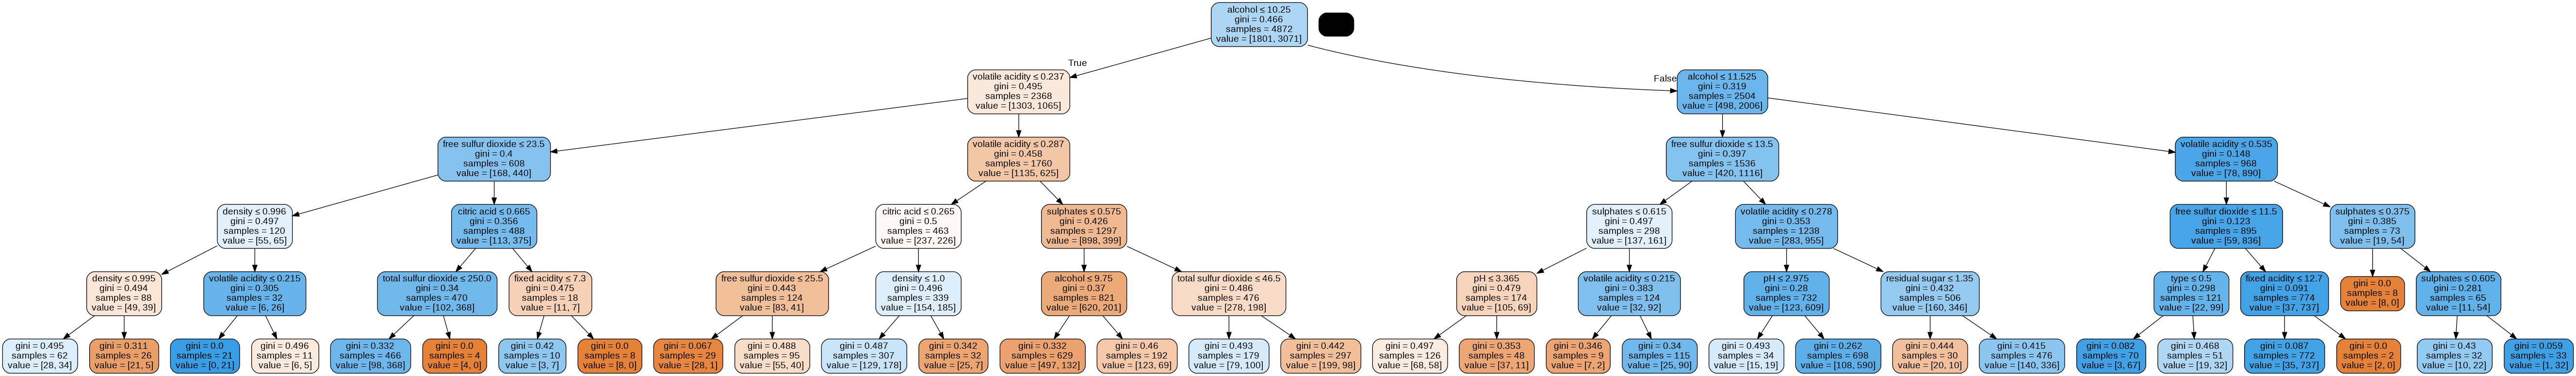

In [24]:
from six import StringIO
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
# importing classification
from pycaret.classification import *

### Setting up the AutoML classifier

In [26]:
# Setting up
clf1 = setup(data = Chateau_Montelena_AutoMLM, 
             target = 'quality',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             silent = True)

,Description,Value
0,session_id,6417
1,Target,quality
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6497, 13)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('dummy', Dummify(target='quality')),
                ('fix_perfect', Remove_100(target='quality')),
                ('clean_names', Clean_Colum_Names()),
   

### Model Comparison & Evaluation

In [27]:
best_model=compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8133,0.8934,0.8557,0.8531,0.8544,0.5943,0.5944,0.390
rf,Random Forest Classifier,0.8082,0.8843,0.8426,0.8557,0.8490,0.5862,0.5867,0.626
lightgbm,Light Gradient Boosting Machine,0.8034,0.8635,0.8361,0.8538,0.8448,0.5767,0.5770,0.240
dt,Decision Tree Classifier,0.7495,0.7320,0.7945,0.8104,0.8023,0.4605,0.4608,0.142
gbc,Gradient Boosting Classifier,0.7530,0.8356,0.7570,0.8414,0.7968,0.4840,0.4887,0.718
knn,K Neighbors Classifier,0.7363,0.8057,0.7278,0.8393,0.7794,0.4556,0.4632,0.174
qda,Quadratic Discriminant Analysis,0.7249,0.7927,0.7577,0.8018,0.7786,0.4157,0.4176,0.036
ada,Ada Boost Classifier,0.7330,0.8078,0.7292,0.8328,0.7773,0.4476,0.4539,0.246
lda,Linear Discriminant Analysis,0.7297,0.8063,0.7148,0.8393,0.7718,0.4455,0.4545,0.042
svm,SVM - Linear Kernel,0.7246,0.0000,0.7323,0.8218,0.7708,0.4268,0.4361,0.072


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6417, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### Hyperparameter Tuning

In [28]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7396,0.8230,0.7199,0.8499,0.7795,0.4667,0.4763
1,0.7297,0.8089,0.7010,0.8500,0.7684,0.4509,0.4631
2,0.7140,0.7929,0.6942,0.8313,0.7566,0.4166,0.4266
3,0.7140,0.7942,0.7113,0.8182,0.7610,0.4092,0.4154
4,0.7052,0.8016,0.6787,0.8298,0.7467,0.4024,0.4141
Mean,0.7205,0.8041,0.7010,0.8358,0.7624,0.4292,0.4391
Std,0.0124,0.0110,0.0142,0.0124,0.0111,0.0251,0.0257


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.002, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
                     oob_score=False, random_state=6417, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [29]:
tuned_model.predict

<bound method ForestClassifier.predict of ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.002, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
                     oob_score=False, random_state=6417, verbose=0,
                     warm_start=False)>

### Interpreting Logistic Regression Model using SHAP

##SHAP VALUE INTERPRETATION
* Positive SHAP value means positive impact on prediction
* Negative SHAP value means negative impact on prediction


In [30]:
import shap
X100 = shap.utils.sample(X_train, 100) # 100 instances for use as the background distribution
sample_ind = 20

In [31]:
log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
explainer_log = shap.Explainer(log.predict, X100)

In [33]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

In [34]:
# compute the SHAP values for the linear model
shap_values_log = explainer_log(X_train)

Permutation explainer: 4873it [03:48, 20.42it/s]                          


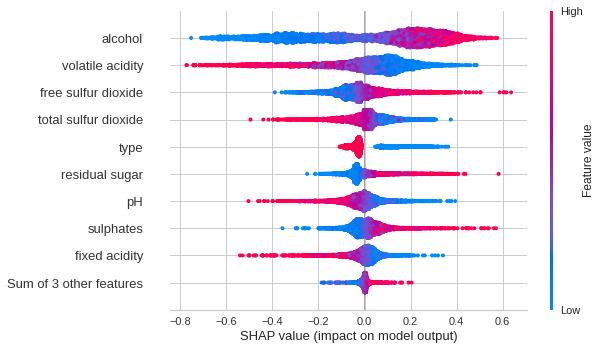

In [35]:
shap.plots.beeswarm(shap_values_log)

**Observation**

* Higher the alcohol value, higher the positive influence on model output.

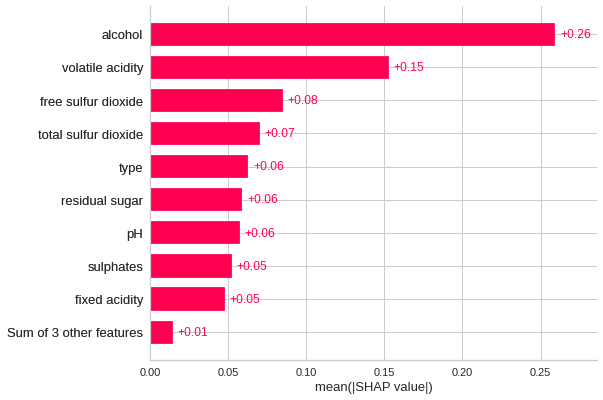

In [36]:
shap.plots.bar(shap_values_log)

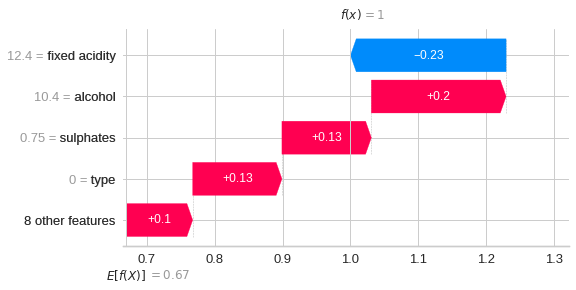

In [37]:
shap.plots.waterfall(shap_values_log[sample_ind], max_display=5)

12.4 fixed acidity value reduces the quality value to be the one predicted now.

#Partial Dependency
Keeping one attribute constant, all other attributes are changed which gives us the dependency of the constant variable on the target variable.

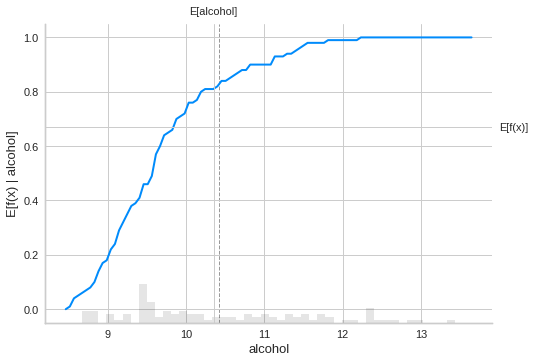

In [38]:
shap.partial_dependence_plot(
    "alcohol", log.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Quality increases exponentially with alcohol for some amount of time and then plateaus.

### Interpreting Decision Tree Model using SHAP

In [39]:
# compute the SHAP values for the linear model
explainer_dt = shap.Explainer(dt.predict, X100)
shap_values_dt = explainer_dt(X_train)

Permutation explainer: 4873it [02:41, 28.23it/s]                          


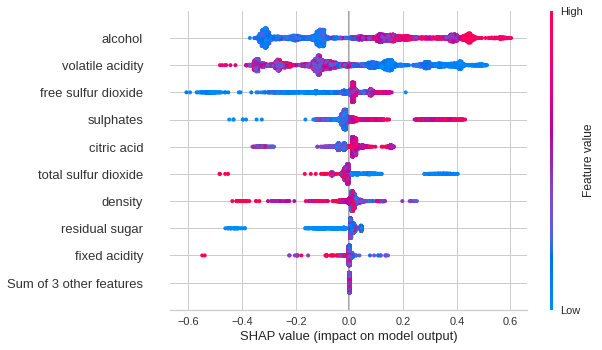

In [40]:
shap.plots.beeswarm(shap_values_dt)

**Observation**

* Higher the alcohol value, higher the positive influence on model output.

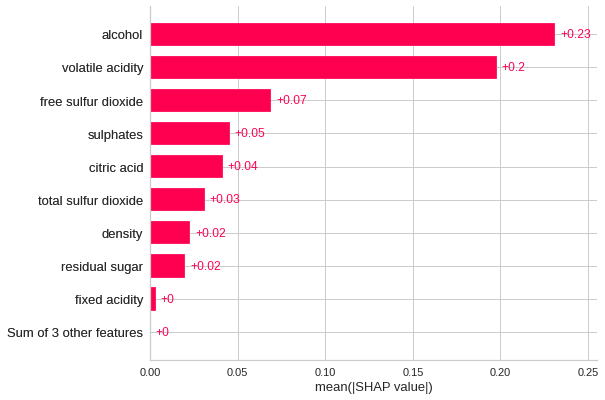

In [41]:
shap.plots.bar(shap_values_dt)

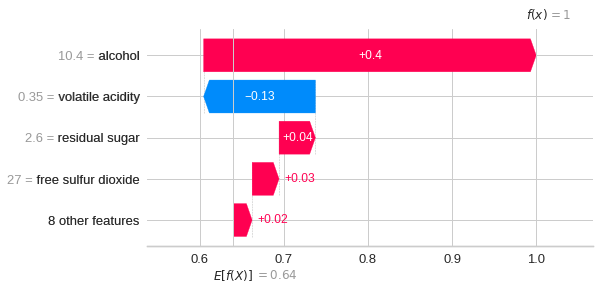

In [42]:
shap.plots.waterfall(shap_values_dt[sample_ind], max_display=5)

10.4 alcohol value increases the quality value to be the one predicted now.

### Interpreting Random Tress Classifier (AutoML) Model using SHAP

In [ ]:
# compute the SHAP values for the linear model
explainer_automl = shap.Explainer(tuned_model.predict, X100)
shap_values_automl = explainer_automl(X_train)

Permutation explainer:  14%|█▍        | 690/4872 [10:57<1:05:22,  1.07it/s]

In [ ]:
shap.plots.beeswarm(shap_values_automl)

**Observation**

* Lower the volatile acidity value, higher the positive influence on model output.

In [ ]:
shap.plots.bar(shap_values_automl)

In [ ]:
shap.plots.waterfall(shap_values_automl[sample_ind], max_display=5)

0.35 volatile acidity value decreases the quality value to be the one predicted now.

# Conclusion:

* Several **data preprocessing and preparation** exercises like imputing missing values, handling outliers, standardizing/normalizing variables, one-hot/ordinal/cardinal encoding, target imbalance and feature selection are provided by PyCaret.
* Using SHAP analysis we can predict the % change an attribute has on the model output.
* We can plot graph for model dependency on each attribute.


# License

**References*** 
* https://pycaret.org
* https://pycaret.readthedocs.io/en/stable/api/classification.html

Copyright (c) 2022 indoriarishabh25

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.